# CA2 Karina Schmidt 2023314

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [2]:
df = pd.read_csv('recipient_totals.csv')

# DATA UNDERSTANDING

In [3]:
df.head()

,period,programme,scheme,scheme_description,basis,recipients
0,2014Q1,Children,BSCFA,Back To School Clothing And Footwear,Social Assistance,137
1,2014Q1,Children,CB,Child Benefit,Social Assistance,623739
2,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,48327
3,2014Q1,Children,ORC,Guardians Payment (Contributory),Social Insurance,487
4,2014Q1,Children,ORNC,Guardians Payment (Non-Contributory),Social Assistance,221


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              1647 non-null   object
 1   programme           1647 non-null   object
 2   scheme              1647 non-null   object
 3   scheme_description  1647 non-null   object
 4   basis               1647 non-null   object
 5   recipients          1647 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 77.3+ KB


In [5]:
df.shape

(1647, 6)

In [6]:
df.describe()

,recipients
count,1647.000000
mean,57911.921676
std,119336.796418
min,1.000000
25%,718.000000
50%,7197.000000
75%,62312.500000
max,734259.000000


In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

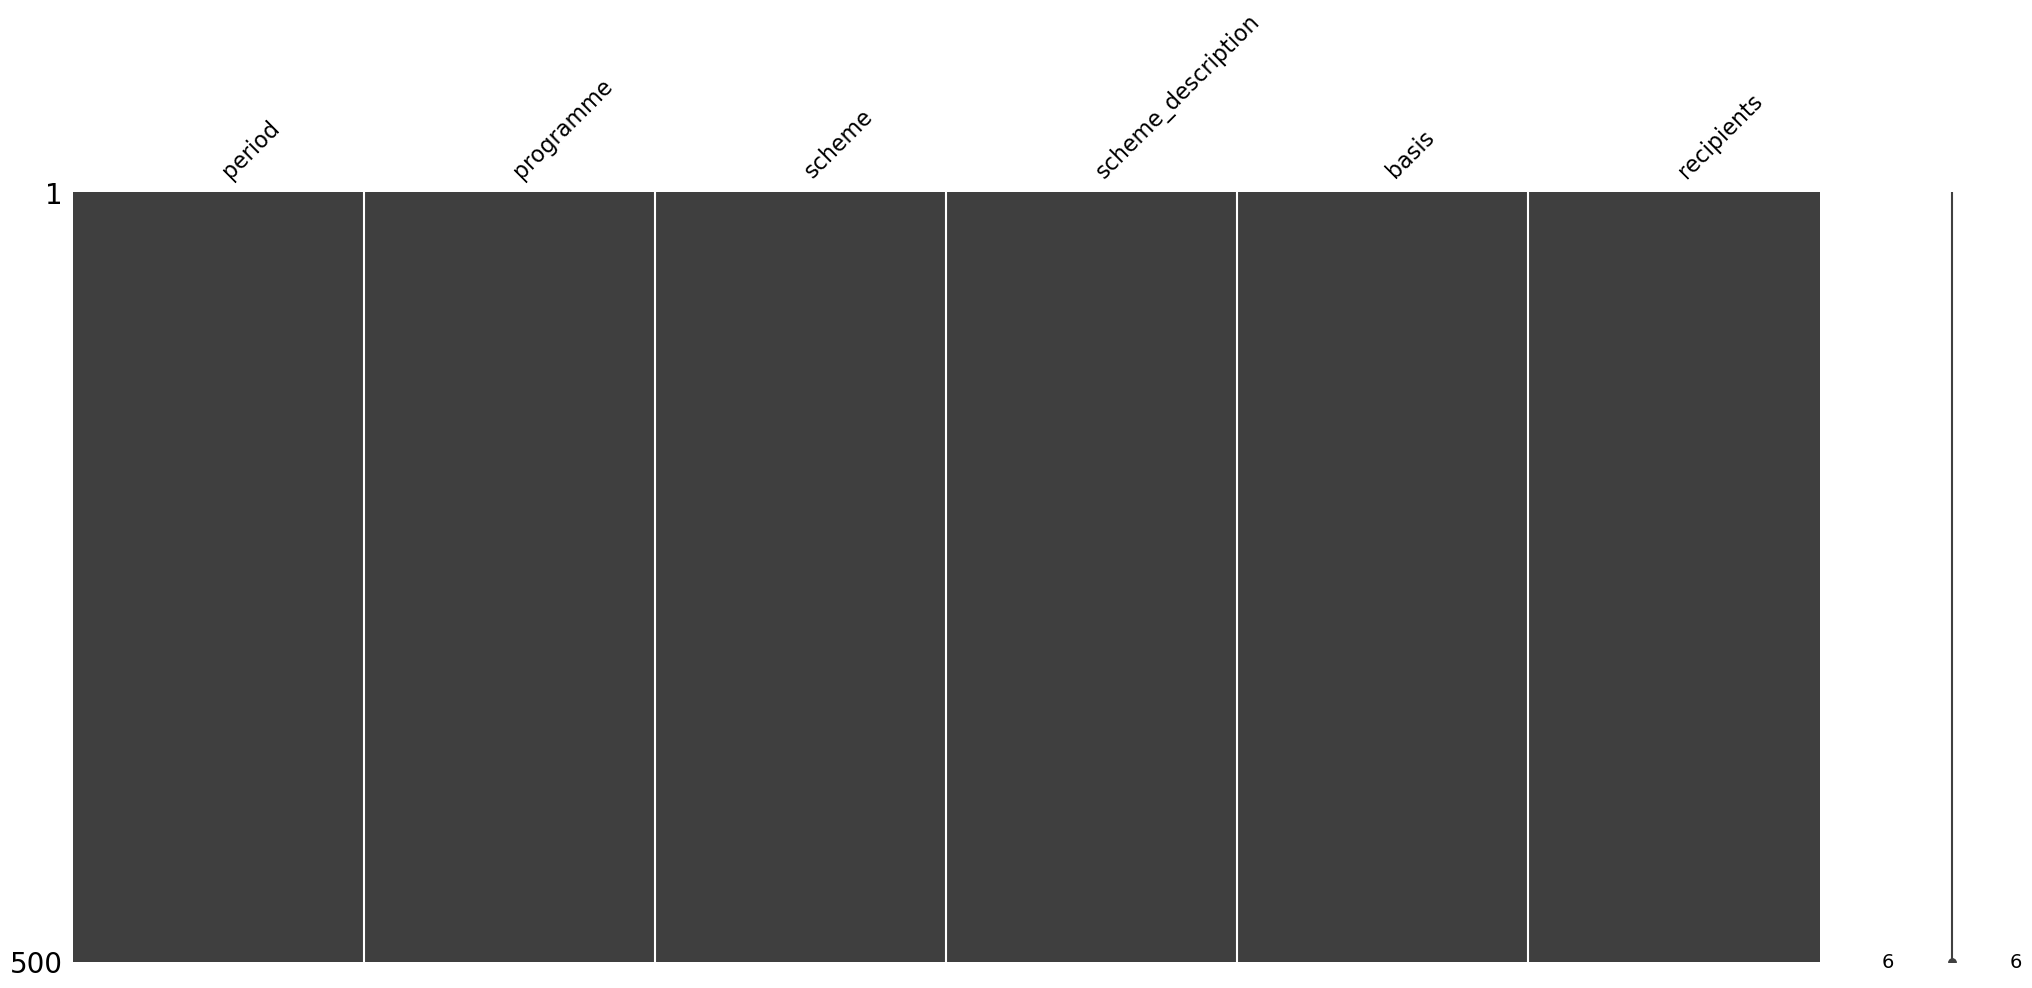

In [9]:
ax = msno.matrix(df.sample(500))

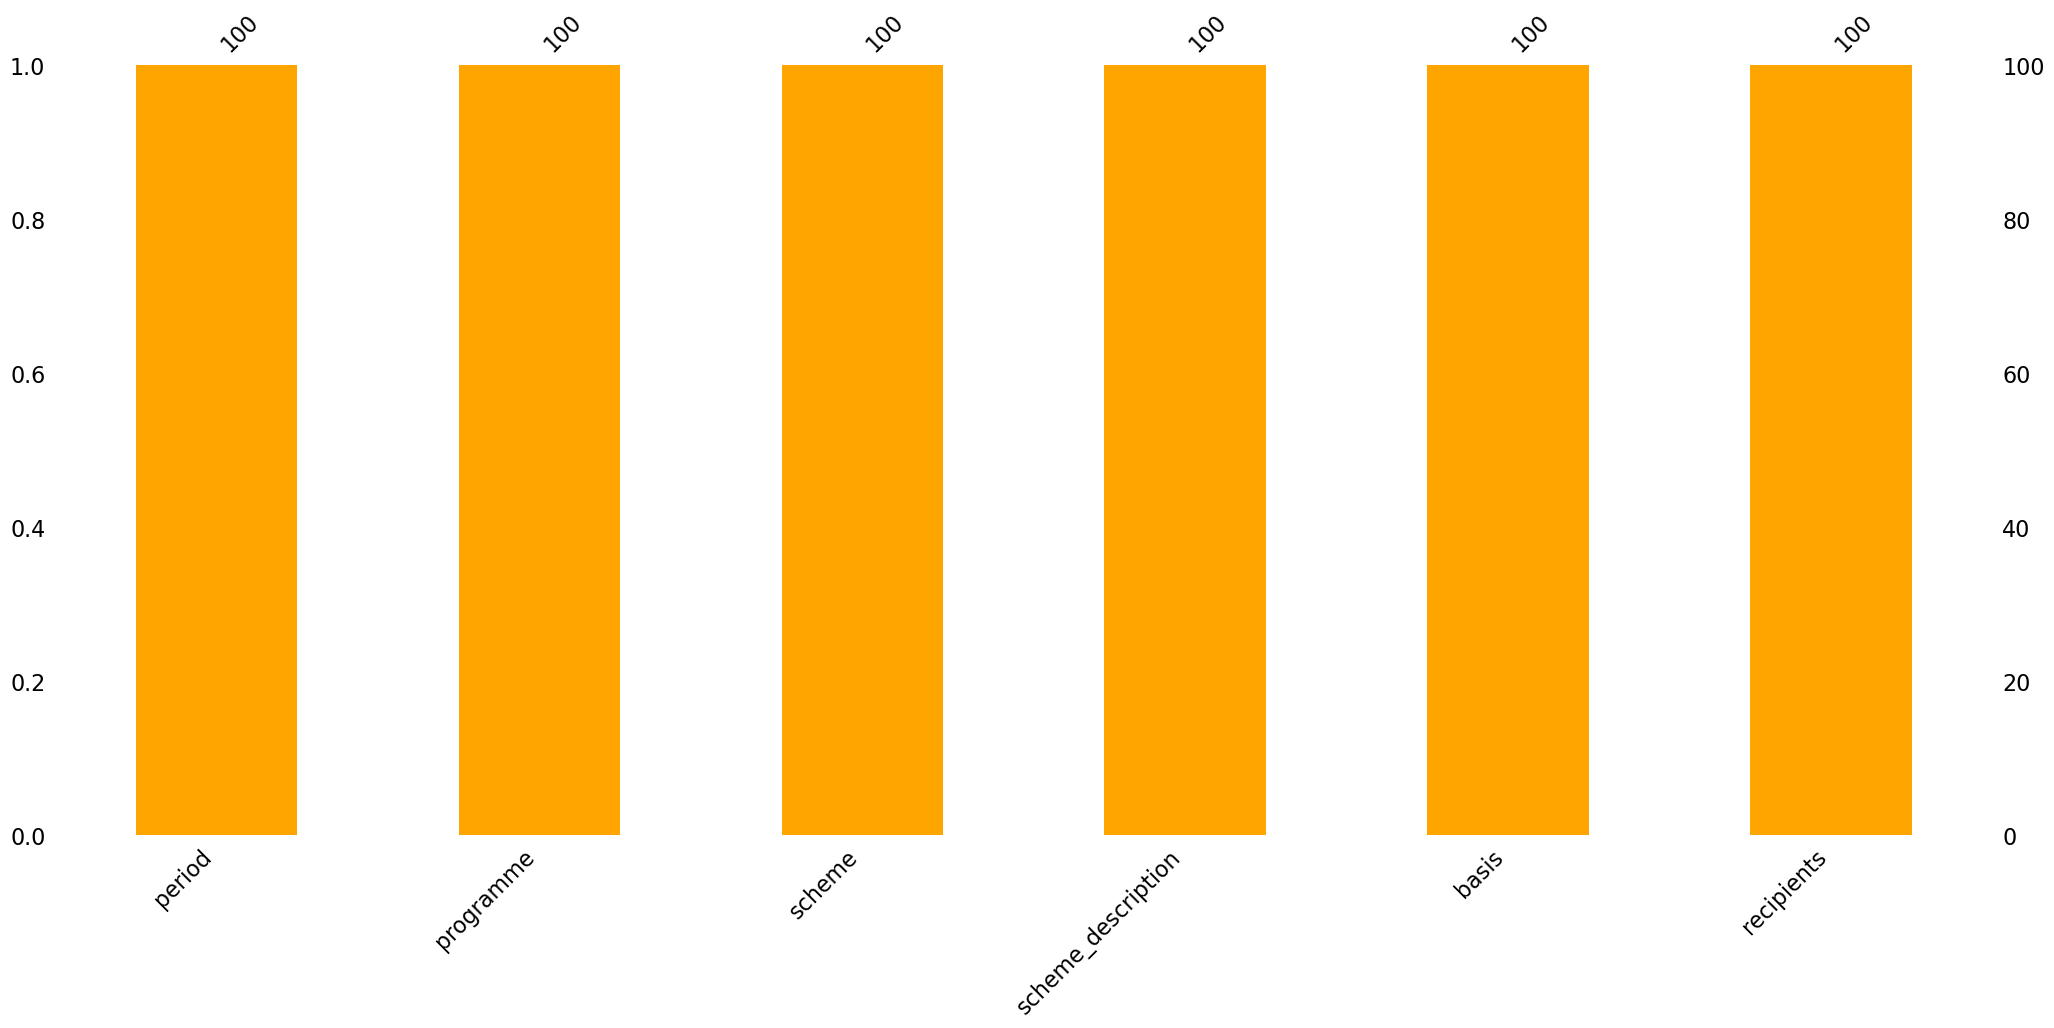

In [10]:
ax = msno.bar(df.sample(100), color='orange')

The bar chart generated by this code visually shows the presence of null values in different columns of the new_df DataFrame. Each vertical bar represents a column, and the height of the bar indicates the proportion of null values in that column. If the bar is completely filled, it means there are no null values in that column.

This type of visualization is useful for identifying patterns of null values and understanding which columns have the most missing data.

# DATA PREPARATION

In [11]:
df.head()

,period,programme,scheme,scheme_description,basis,recipients
0,2014Q1,Children,BSCFA,Back To School Clothing And Footwear,Social Assistance,137
1,2014Q1,Children,CB,Child Benefit,Social Assistance,623739
2,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,48327
3,2014Q1,Children,ORC,Guardians Payment (Contributory),Social Insurance,487
4,2014Q1,Children,ORNC,Guardians Payment (Non-Contributory),Social Assistance,221


In [12]:
# Select just "working age" in the columns programme
new_df = df[df['programme'].str.contains('Working Age Employment Supports', case=True)] #drop some row# Selecione apenas as linhas onde 'programme' está na lista de valores desejados
desired_programmes = ['Illness,Disability and Caring', 'Pensions', 'Supplementary Payments and Miscellaneous Services',
                      'Working Age Employment Supports', 'Working Age Income Supports']
new_df = df[df['programme'].isin(desired_programmes)]

In [13]:
new_df.head()

,period,programme,scheme,scheme_description,basis,recipients
5,2014Q1,"Illness,Disability and Caring",BPP,Blind Persons Pension,Social Assistance,750
6,2014Q1,"Illness,Disability and Caring",CAR,Carers Allowance,Social Assistance,58953
7,2014Q1,"Illness,Disability and Caring",CARB,Carers Benefit,Social Insurance,1697
8,2014Q1,"Illness,Disability and Caring",DB,Illness Benefit,Social Insurance,102450
9,2014Q1,"Illness,Disability and Caring",DISP,Disablement Benefit,Social Insurance,10544


In [14]:
new_df = new_df.drop(columns = ['scheme'])
new_df.head()

,period,programme,scheme_description,basis,recipients
5,2014Q1,"Illness,Disability and Caring",Blind Persons Pension,Social Assistance,750
6,2014Q1,"Illness,Disability and Caring",Carers Allowance,Social Assistance,58953
7,2014Q1,"Illness,Disability and Caring",Carers Benefit,Social Insurance,1697
8,2014Q1,"Illness,Disability and Caring",Illness Benefit,Social Insurance,102450
9,2014Q1,"Illness,Disability and Caring",Disablement Benefit,Social Insurance,10544


# Label Encoder

In [64]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
new_df.period = le.fit_transform(new_df.period)
new_df.scheme_description = le.fit_transform(new_df.scheme_description)
new_df.basis = le.fit_transform(new_df.basis)
new_df.programme = le.fit_transform(new_df.programme)

#trocar letrar por números

In [97]:
new_df.head()

,period,programme,scheme_description,basis,recipients
5,0,0,3,0,750
6,0,0,4,0,58953
7,0,0,5,1,1697
8,0,0,15,1,102450
9,0,0,10,1,10544


In [98]:
def set_header_font():
    return [dict(selector="th", props=[("font-size", "14pt")])]

In [99]:
new_df.describe(percentiles=[.01,.99]).transpose().style.format('{:.2f}').\
                set_properties(**{'font-size': '12pt'}).set_table_styles(set_header_font())

,count,mean,std,min,1%,50%,99%,max
period,1431.00,18.40,10.66,0.00,0.00,19.00,36.00,36.00
programme,1431.00,2.24,1.70,0.00,0.00,2.00,4.00,4.00
scheme_description,1431.00,19.97,12.09,0.00,0.00,19.00,40.00,41.00
basis,1431.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00
recipients,1431.00,47623.32,85514.77,1.00,3.60,7940.00,448208.80,734259.00


# Model Building and Evaluation



# Decision Tree

In [115]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [116]:
# Putting feature variable to X
X = new_df.drop('recipients', axis=1)

# Putting response variable to y
y = new_df['recipients']

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,period,programme,scheme_description,basis
588,13,4,6,0
1386,31,0,23,1
487,11,1,35,0
114,2,4,6,0
1062,24,2,30,0


In [118]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [119]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.01      1.00      0.02         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.50      0.25      0.33         4
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          23       0.00    

In [120]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[0 2 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
0.009302325581395349


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.999\nsamples = 1001\nvalue = [3, 4, 3, 1, 1, 4, 1, 6, 6, 5, 1, 4, 1, 3\n4, 3, 5, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3\n2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 3\n1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1\n1, 1, 3, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2\n1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1\n1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1\n3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1,

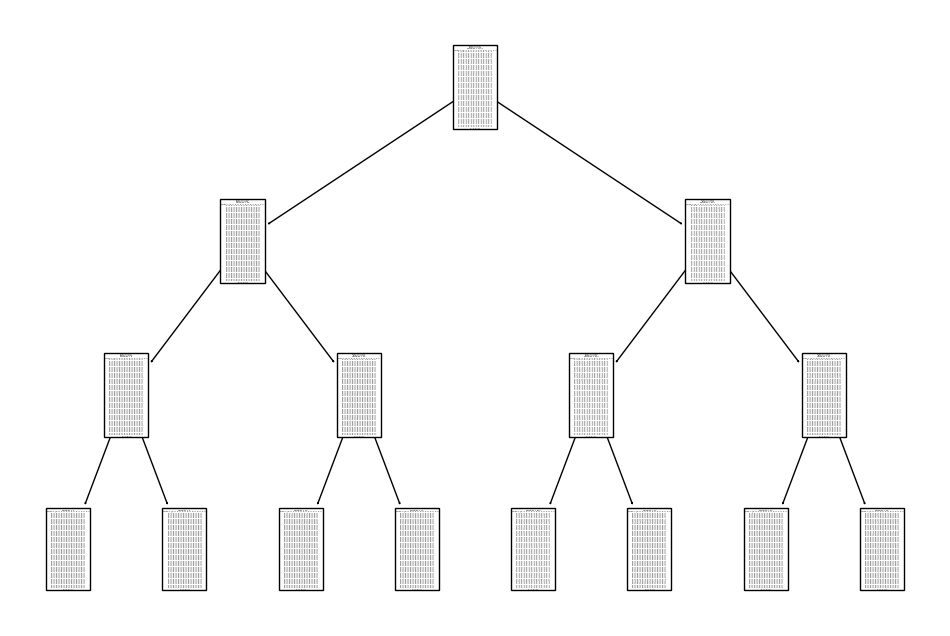

In [121]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.tree import export_graphviz
import graphviz

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default)



# Grid Search CV

In [145]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(3),
    'criterion': ["entropy", "gini"]
}

n_folds = 2

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entroty', 'gini'],
                         'max_depth': range(0, 3)},
             verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0,0.0,0.000000,0.000000,entropy,0,"{'criterion': 'entropy', 'max_depth': 0}",NaN,NaN,NaN,NaN,5
1,0.0,0.0,0.007811,0.007811,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.003992,0.006,0.004996,0.001004,2
2,0.0,0.0,0.007812,0.007812,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.003992,0.008,0.005996,0.002004,1
3,0.0,0.0,0.000000,0.000000,gini,0,"{'criterion': 'gini', 'max_depth': 0}",NaN,NaN,NaN,NaN,5
4,0.0,0.0,0.000000,0.000000,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.003992,0.004,0.003996,0.000004,4
5,0.0,0.0,0.000000,0.000000,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.003992,0.006,0.004996,0.001004,2


In [124]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.005996007984031936
DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [125]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.005996007984031936

# Running the model with best parameters obtained from grid search

In [140]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 500,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=500)

In [141]:
# accuracy score
clf_gini.score(X_test,y_test)

0.0069767441860465115

In [142]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


[Text(0.4090605945121951, 0.95, 'x[2] <= 0.5\ngini = 0.999\nsamples = 1001\nvalue = [3, 4, 3, 1, 1, 4, 1, 6, 6, 5, 1, 4, 1, 3\n4, 3, 5, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3\n2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 3\n1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1\n1, 1, 3, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2\n1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1\n1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1\n3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 

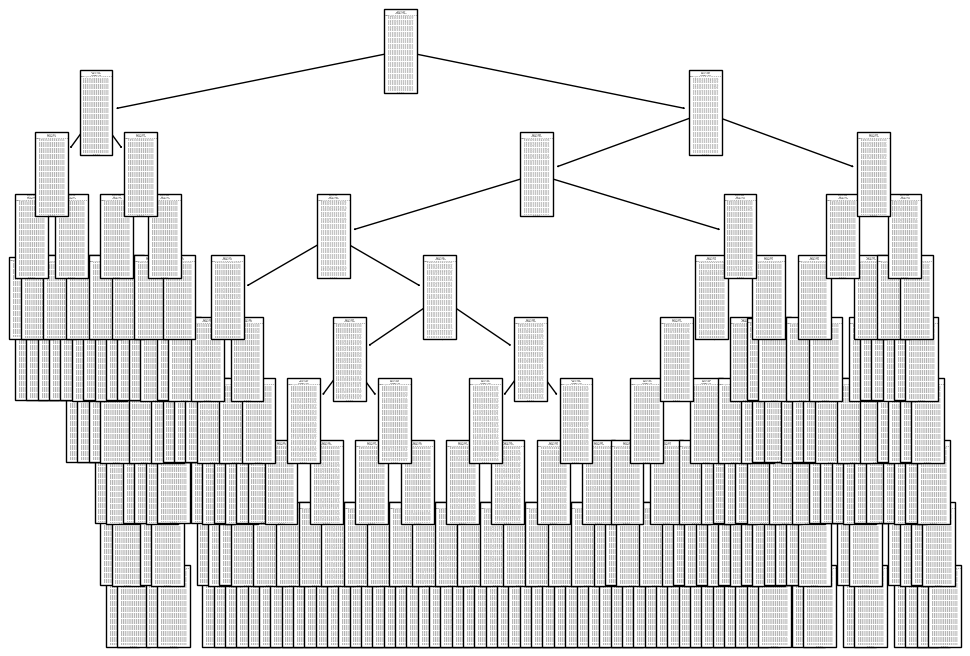

In [143]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [144]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 500,
                                  max_depth=3, 
                                  min_samples_leaf=6,
                                  min_samples_split=6)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.009302325581395349


# Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

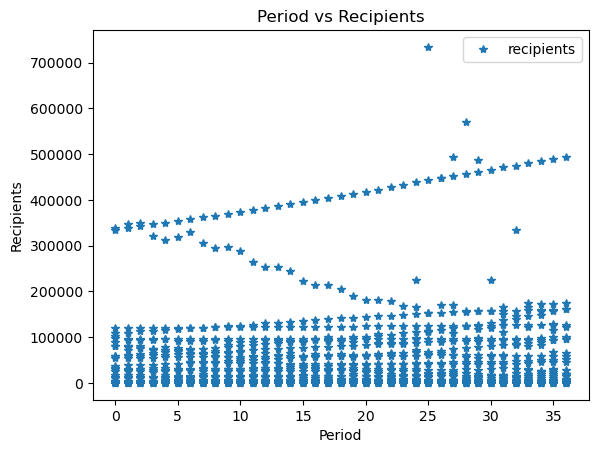

In [132]:
new_df.plot(x='period', y='recipients', style='*')
plt.title('Period vs Recipients')
plt.xlabel('Period')
plt.ylabel('Recipients')
plt.show()

In [37]:
# Split the dataset into X and y columns
X = new_df.iloc[:, :-1].values            # Independent variables
y = new_df.iloc[:, 1].values              # Dependent variable

In [38]:
print(len(X_train), len(y_train))

1001 1001


In [39]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1431, 4), (1431,), (1144, 4), (287, 4), (1144,), (287,))

In [41]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
import numpy as np

In [43]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  1.0
STD:  0.0




Inappropriate model.

A negative can occur when the model is worse than a simple model that just predicts the mean of the dependent variable for all data points. This suggests that the model is failing to capture the relationship between the independent and dependent variables.